# Case Study #2

## Setup

In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('./casestudy.csv', index_col=0)

In [75]:
df.sample(5)

,customer_email,net_revenue,year
659962,hysbrrojte@gmail.com,136.98,2017
210070,wtfbmpkcdg@gmail.com,27.05,2015
276849,lmltivnrcq@gmail.com,185.41,2016
175691,ksthzvvrsh@gmail.com,111.24,2015
366478,lowbyntsrg@gmail.com,220.84,2016


In [76]:
df.customer_email.value_counts()

wtbxliuywf@gmail.com     3
leafpkocos@gmail.com     3
yutbpprfrj@gmail.com     3
pwllhvbpzv@gmail.com     3
ofysynyagn@gmail.com     3
                        ..
 jzkxvcumhr@gmail.com    1
gknvzmmwxi@gmail.com     1
qjxzeiurgm@gmail.com     1
 srhiqoyxrk@gmail.com    1
 aregboumbw@gmail.com    1
Name: customer_email, Length: 604618, dtype: int64

## Total revenue for the current year

In [77]:
res = df.groupby('year').agg({"net_revenue": "sum"})
res.columns = ['Total_revenue']
res

,Total_revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


## New Customer Revenue

In [78]:
years = list(df.year.unique())
years

[2015, 2016, 2017]

In [79]:
df_2015 = df[df.year == 2015]
df_2016 = df[df.year == 2016]
df_2017 = df[df.year == 2017]

new_2016 = df_2016.loc[~df_2016['customer_email'].isin(df_2015['customer_email'])]
new_2017 = df_2017.loc[~(df_2017['customer_email'].isin(df_2016['customer_email']))]

new = pd.concat([new_2016, new_2017])
res = new.groupby('year').agg({"net_revenue": "sum"})
res.columns = ['Total_revenue_for_new_customer']
res

,Total_revenue_for_new_customer
year,
2016,18245491.01
2017,28776235.04


## Existing Customer Growth

In [80]:
exi_2016 = df_2016.loc[df_2016['customer_email'].isin(df_2015['customer_email'])]
exi_2017 = df_2017.loc[df_2017['customer_email'].isin(df_2016['customer_email'])]

exi = pd.concat([exi_2016, exi_2017])
res0 = exi.groupby('year').agg({"net_revenue": "sum"})
# print(res0)
res = res0.diff()
res

,net_revenue
year,
2016,NaN
2017,-4844192.59


## Revenue lost from attrition

In [102]:
lost_2016 = df_2015.loc[~df_2015['customer_email'].isin(df_2016['customer_email'])]
lost_2017 = df_2016.loc[~df_2016['customer_email'].isin(df_2017['customer_email'])]

lost = pd.concat([lost_2016, lost_2017])
res = lost.groupby('year').agg({"net_revenue": "sum"})
res.columns = ['Revenue lost from attrition']
res.index = [2016, 2017]
res

,Revenue lost from attrition
2016,21571632.07
2017,23110294.94


## Existing Customer Revenue Current Year

In [82]:
res = exi.groupby('year').agg({"net_revenue": "sum"})
res

,net_revenue
year,
2016,7485452.58
2017,2641259.99


## Existing Customer Revenue Prior Year

In [83]:
res.shift(1)

,net_revenue
year,
2016,NaN
2017,7485452.58


## Total Customers Current Year


In [84]:
res = df.groupby('year').agg({"customer_email": 'count'})
res.columns = ['count']
res

,count
year,
2015,231294
2016,204646
2017,249987


## Total Customers Previous Year

In [85]:
res.shift(1)

,count
year,
2015,NaN
2016,231294.0
2017,204646.0


## New Customers


In [86]:
res = new.groupby('year').agg({"customer_email": 'count'})
res.columns = ['count']
res

,count
year,
2016,145062
2017,229028


## Lost Customers

In [103]:
res = lost.groupby('year').agg({"customer_email": 'count'})
res.columns = ['count']
res.index = [2016, 2017]
res

,count
2016,171710
2017,183687


## Visualization

1. Customer number growth per year

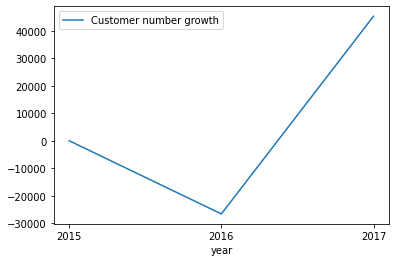

In [98]:
from matplotlib.ticker import FixedLocator, MaxNLocator

cust_num_growth = df.groupby('year').agg({'customer_email': 'count'}).diff()
cust_num_growth.columns = ['Customer number growth']
cust_num_growth = cust_num_growth.fillna(0)
cust_num_growth.plot()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(steps=[1]))
ax.xaxis.set_minor_locator(FixedLocator(range(2015,2017)))

2. Add new customers and lost customers to graph

<AxesSubplot:xlabel='year'>

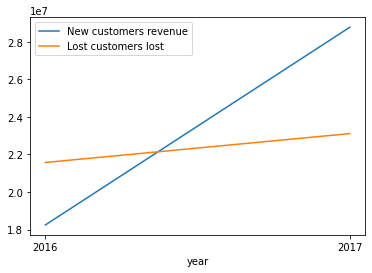

In [110]:
cust_new = new.groupby('year').agg({"net_revenue": "sum"})
cust_new.columns = ['New customers revenue']
cust_lost = lost.groupby('year').agg({"net_revenue": "sum"})
cust_lost.columns = ['Lost customers lost']
cust_lost.index = [2016, 2017]
# ax = cust_num_growth.plot()
cust_new.plot()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(steps=[1]))
ax.xaxis.set_minor_locator(FixedLocator(range(2015,2017)))
cust_lost.plot(ax=ax)

We can conclude that in 2016 the company lost a lot of customers, while the new customers' revenue did not catch up with the loss from lost customers.
But in 2017, the number and revenue from new customers is greater than the loss from lost customers, so the total revenue grows.